<a href="https://colab.research.google.com/github/neelamku/DNN-ttH/blob/main/multiClassifier_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install uproot3
!pip install uproot

     |████████████████████████████████| 117 kB 10.2 MB/s 
     |████████████████████████████████| 87 kB 2.7 MB/s 
     |████████████████████████████████| 289 kB 7.8 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import h5py
import numpy as np
import pandas as pd
import json
import os
import uproot3
import uproot

#root to arrays

tree = uproot3.open("/content/drive/MyDrive/Colab Notebooks/rnn_comb.root")["nominal_Loose_new"]
tree1 = uproot3.open("/content/drive/MyDrive/Colab Notebooks/rnn_rewg_latest.root")["nominal_Loose_new"]

m_truthpt_weights = tree1["truthpt_weights"].array()

m_higgs_truthPt = tree["higgs_truthPt"].array()
m_comb_higgs_truthPt = tree["comb_higgs_truthPt"].array()
m_best_higgs_Pt = tree["best_higgs_Pt"].array()
m_comb_best_higgs_Pt = tree["comb_best_higgs_Pt"].array()
m_best_higgs_Pt_withH = tree["best_higgs_Pt_withH"].array()
m_comb_best_higgs_Pt_withH = tree["comb_best_higgs_Pt_withH"].array()

m_nBTags_DL1r85 = tree["nBTags_DL1r85"].array()
m_nBTags_DL1r70 = tree["nBTags_DL1r70"].array()

m_higgs_pt = tree["comb_higgs_pt"].array()
m_higgs_mass = tree["comb_higgs_mass"].array()
m_hadW_mass = tree["comb_hadW_mass"].array()
m_hadtop_mass = tree["comb_hadtop_mass"].array()
m_leptop_mass = tree["comb_leptop_mass"].array()
m_hadWblepTop_mass = tree["comb_hadWblepTop_mass"].array()
m_minbhadTopqhadW_dR = tree["comb_minbhadTopqhadW_dR"].array()
m_hadWblepTop_dR = tree["comb_hadWblepTop_dR"].array()
m_blepTopbhadTop_dR = tree["comb_blepTopbhadTop_dR"].array()
m_bhadTopq2hadW_dR = tree["comb_bhadTopq2hadW_dR"].array()
m_hadWbhadTop_dR = tree["comb_hadWbhadTop_dR"].array()
m_Higgsq1hadW_mass = tree["comb_Higgsq1hadW_mass"].array()
m_bbHiggs_dR = tree["comb_bbHiggs_dR"].array()
m_bhadTopq1hadW_dR = tree["comb_bhadTopq1hadW_dR"].array()
m_qqhadW_dR = tree["comb_qqhadW_dR"].array()
m_diff_mindRbhadTopqhadW_dRlepblepTop = tree["comb_diff_mindRbhadTopqhadW_dRlepblepTop"].array()
m_lepbhadTop_dR = tree["comb_lepbhadTop_dR"].array()
m_lepb1Higgs_dR = tree["comb_lepb1Higgs_dR"].array()
m_lepWbhadTop_mass = tree["comb_lepWbhadTop_mass"].array()
m_lepblepTop_dR = tree["comb_lepblepTop_dR"].array()

In [ ]:
#prepare data###

in_higgs_truthPt = []
in_best_higgs_Pt_withH = []

#20 variables for input

varList = []
in_higgs_pt = []
in_higgs_mass = []
in_hadW_mass = []
in_hadtop_mass = []
in_leptop_mass = []
in_hadWblepTop_mass = []
in_minbhadTopqhadW_dR = []
in_hadWblepTop_dR = []
in_blepTopbhadTop_dR = []
in_bhadTopq2hadW_dR = []
in_hadWbhadTop_dR = []
in_Higgsq1hadW_mass = []
in_bbHiggs_dR = []
in_bhadTopq1hadW_dR = []
in_qqhadW_dR = []
in_diff_mindRbhadTopqhadW_dRlepblepTop = []
in_lepbhadTop_dR = []
in_lepb1Higgs_dR = []
in_lepWbhadTop_mass = []
in_lepblepTop_dR = []


### BTag selections
in_nBTags_DL1r85 = []
in_nBTags_DL1r70 = []

### Truth pT weights
in_truthpt_weights = []

### count 
pass_no = 0
count = []

### put selections and fill only those events

for i in range(0,len(m_higgs_truthPt)):
  if (m_higgs_truthPt[i]>0): 
   if (m_nBTags_DL1r70[i]>=4):
    if (len(m_higgs_pt[i])>0): #select events with 12/24 combinations

      pass_no = pass_no + 1
      count.append(pass_no)

      ###fill inputs here

      in_higgs_truthPt.append(m_higgs_truthPt[i])
      in_best_higgs_Pt_withH.append(m_best_higgs_Pt_withH[i])
  
      ###

      in_higgs_pt.append(m_higgs_pt[i])
      in_higgs_mass.append(m_higgs_mass[i])
      in_hadW_mass.append(m_hadW_mass[i])
      in_hadtop_mass.append(m_hadtop_mass[i])
      in_leptop_mass.append(m_leptop_mass[i])
      in_hadWblepTop_mass.append(m_hadWblepTop_mass[i])
      in_minbhadTopqhadW_dR.append(m_minbhadTopqhadW_dR[i])
      in_hadWblepTop_dR.append(m_hadWblepTop_dR[i])
      in_blepTopbhadTop_dR.append(m_blepTopbhadTop_dR[i])
      in_bhadTopq2hadW_dR.append(m_bhadTopq2hadW_dR[i])
      in_hadWbhadTop_dR.append(m_hadWbhadTop_dR[i])
      in_Higgsq1hadW_mass.append(m_Higgsq1hadW_mass[i])
      in_bbHiggs_dR.append(m_bbHiggs_dR[i])
      in_bhadTopq1hadW_dR.append(m_bhadTopq1hadW_dR[i])
      in_qqhadW_dR.append(m_qqhadW_dR[i])
      in_diff_mindRbhadTopqhadW_dRlepblepTop.append(m_diff_mindRbhadTopqhadW_dRlepblepTop[i])
      in_lepbhadTop_dR.append(m_lepbhadTop_dR[i])
      in_lepb1Higgs_dR.append(m_lepb1Higgs_dR[i])
      in_lepWbhadTop_mass.append(m_lepWbhadTop_mass[i])
      in_lepblepTop_dR.append(m_lepblepTop_dR[i])
         
      ###
      
      in_truthpt_weights.append(m_truthpt_weights[i])

a1 = len(count)
print (a1)

73094


In [ ]:
#make fixed length for inputs

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

varOrder = [in_higgs_pt,in_higgs_mass,in_hadW_mass,in_hadtop_mass,in_leptop_mass,in_hadWblepTop_mass,in_minbhadTopqhadW_dR,in_hadWblepTop_dR,in_blepTopbhadTop_dR,in_bhadTopq2hadW_dR,in_hadWbhadTop_dR,in_Higgsq1hadW_mass,in_bbHiggs_dR,in_bhadTopq1hadW_dR,in_qqhadW_dR,in_diff_mindRbhadTopqhadW_dRlepblepTop,in_lepbhadTop_dR,in_lepb1Higgs_dR,in_lepWbhadTop_mass,in_lepblepTop_dR]
padded_input = []

for j in range(0,len(varOrder)):
  padded_input.append(tf.keras.preprocessing.sequence.pad_sequences(varOrder[j], padding="post",dtype='float32'))

X_sig = np.array(padded_input)
X_sig_all_input = np.transpose(X_sig, (1, 2, 0))
print (X_sig_all_input.shape)

#mask zero from normalization
#uncomment if normalize

nz = np.any(X_sig_all_input, -1)
X_sig_all_input[nz] = StandardScaler().fit_transform(X_sig_all_input[nz])

#print(X_sig_all_input[:10])

(73094, 24, 20)


In [ ]:
##target
Y_sig = np.copy(in_higgs_truthPt)
print (Y_sig.shape)

## best higgs pT
X_sig_best_higgs_pt_withH = np.copy(in_best_higgs_Pt_withH)

##weights
rewg_weights = np.copy(in_truthpt_weights)

(73094,)


In [ ]:
###make classes 

y_classes_truth = []

for j in range(0,len(Y_sig)):
  if Y_sig[j]>=0 and Y_sig[j]<=120000:
    y_classes_truth.append(0)
  if Y_sig[j]>120000 and Y_sig[j]<=200000:
    y_classes_truth.append(1)  
  if Y_sig[j]>200000 and Y_sig[j]<=300000:
    y_classes_truth.append(2) 
  if Y_sig[j]>300000 and Y_sig[j]<=450000:
    y_classes_truth.append(3)   
  if Y_sig[j]>450000:
    y_classes_truth.append(4)   

Y_sig_class = np.copy(y_classes_truth)
#print (Y_sig_class.shape)

from keras.utils import np_utils
Y_sig_class_cat = np_utils.to_categorical(Y_sig_class, 5)

#print (y_classes_truth[:10])
#print (Y_sig[:10])
#print (Y_sig_class_cat[:10])

In [ ]:
##split data: train and test

from sklearn.model_selection import train_test_split

#signal 01
X_train_all_input, X_test_all_input, Y_train_01, Y_test_01 =  train_test_split(X_sig_all_input, Y_sig_class_cat, test_size=0.50, random_state=42 )



In [ ]:
## import functions

import keras
import tensorflow as tf
from keras.layers import BatchNormalization, Layer, TimeDistributed, Dropout
from keras.layers import Dense, Input, ReLU, Masking, LSTM, Embedding, Lambda, Bidirectional, Flatten
from keras.models import Model

from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers.experimental import preprocessing
from keras import backend as K
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import statsmodels.api as sm

#from numpy.random import seed
#seed(1)
#import tensorflow
#tensorflow.random.set_seed(2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
in_inputs = Input(shape=(24,20),name="in_inputs")
masked_input = Masking(mask_value=0)(in_inputs)

# Feed this merged layer to an RNN
lstm = LSTM(100, return_sequences=False, name='LSTM')(masked_input)
dpt = Dropout(rate=0.2)(lstm)

my_inputs = in_inputs

# Fully connected layer
FC = Dense(20, activation='relu', name="Dense")(dpt)

# Softmax for classification
output = Dense(5, activation='softmax', name="output")(FC)
model = Model(inputs=my_inputs, outputs=output)

In [ ]:
opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

earlyStop = EarlyStopping(monitor='val_loss', verbose=True, patience=10)
rnnip_mChkPt = ModelCheckpoint('multiClass_weights.h5',monitor='val_loss', verbose=True,
                               save_best_only=True,
                               save_weights_only=True)
nEpochs = 2000

multiClass_hist = model.fit(X_train_all_input,Y_train_01, epochs=nEpochs, batch_size=256,validation_split=0.2,
                 callbacks=[earlyStop, rnnip_mChkPt])

Epoch 1/2000
115/115 [==============================] - 18s 124ms/step - loss: 0.9915 - accuracy: 0.5524 - val_loss: 0.9320 - val_accuracy: 0.5885

Epoch 00001: val_loss improved from inf to 0.93203, saving model to multiClass_weights.h5
Epoch 2/2000
115/115 [==============================] - 12s 104ms/step - loss: 0.9108 - accuracy: 0.5930 - val_loss: 0.9094 - val_accuracy: 0.5951

Epoch 00002: val_loss improved from 0.93203 to 0.90938, saving model to multiClass_weights.h5
Epoch 3/2000
115/115 [==============================] - 12s 105ms/step - loss: 0.8817 - accuracy: 0.6129 - val_loss: 0.8917 - val_accuracy: 0.6144

Epoch 00003: val_loss improved from 0.90938 to 0.89167, saving model to multiClass_weights.h5
Epoch 4/2000
115/115 [==============================] - 12s 106ms/step - loss: 0.8560 - accuracy: 0.6293 - val_loss: 0.8748 - val_accuracy: 0.6246

Epoch 00004: val_loss improved from 0.89167 to 0.87476, saving model to multiClass_weights.h5
Epoch 5/2000
115/115 [==============

In [ ]:
keras.backend.clear_session()

In [ ]:
test_loss, test_acc = model.evaluate(X_test_all_input,  Y_test_01, verbose=2)
print('\nTest accuracy:', test_acc)

1143/1143 - 8s - loss: 0.9257 - accuracy: 0.6409

Test accuracy: 0.6409281492233276


In [ ]:
epochs = np.arange(1,len(multiClass_hist.history['loss'])+1)

plt.plot(epochs,multiClass_hist.history['loss'],label='training')
plt.plot(epochs,multiClass_hist.history['val_loss'],label='validation')
plt.xlim([0, len(multiClass_hist.history['loss'])+1])
plt.xlabel('epochs',fontsize=14)
plt.ylabel('loss',fontsize=14)
plt.legend()
plt.title('LSTM: multi-class')
plt.show()

In [ ]:
ypred = model.predict(X_test_all_input, batch_size=256)


In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix


target_names = ['0-120', '120-200','200-300','300-450','450-']
print(classification_report(np.argmax(Y_test_01, axis=1), ypred.argmax(axis=1), target_names=target_names))


              precision    recall  f1-score   support

       0-120       0.71      0.82      0.76     18033
     120-200       0.55      0.45      0.49     10247
     200-300       0.53      0.45      0.49      5371
     300-450       0.56      0.56      0.56      2303
        450-       0.57      0.53      0.55       593

    accuracy                           0.64     36547
   macro avg       0.58      0.56      0.57     36547
weighted avg       0.63      0.64      0.63     36547



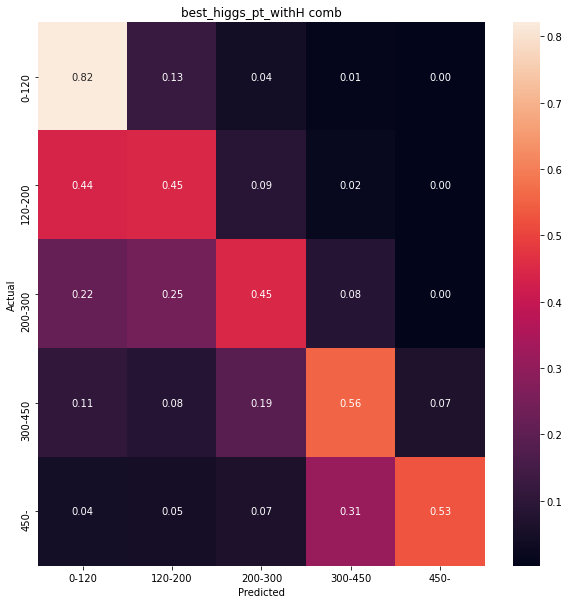

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(np.argmax(Y_test_01, axis=1), np.argmax(ypred, axis=1),labels=None, sample_weight=None,normalize=None)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('best_higgs_pt_withH comb')

plt.show(block=False)